# Tutorial de `pytrends` (Google Trends API para python)

En este cuaderno realizaremos el tutorial de `pytrends`. El material aqui presentado es adaptado de este [tutorial](https://github.com/Tanu-N-Prabhu/Python/blob/master/Google_Trends_API.ipynb).

La documentación de la biblioteca `pytrends` puede encontrarse [aqui](https://pypi.org/project/pytrends/).

## Implementation

## Conecting to Google

Conectamos con google usando el método `TrendReq()` de la biblioteca `pytrends.request`. Adicionalmente, importamos pandas para visualizar y almacenar datos.

In [2]:
import pandas as pd    
import matplotlib.pyplot as plt
from pytrends.request import TrendReq

pytrend = TrendReq()

## Interest by Region

Exploremos qué tan popular es la búsqueda 'Coronavirus' a nivel mundial.

In [3]:
pytrend.build_payload(kw_list=['Coronavirus'])
# Interest by Region
df = pytrend.interest_by_region(resolution = 'COUNTRY') # no funciona con resolution = 'CITY', 'DMA', 'REGION'
df.tail(10)

,Coronavirus
geoName,
Vanuatu,0
Vatican City,0
Venezuela,25
Vietnam,0
Wallis & Futuna,0
Western Sahara,0
Yemen,0
Zambia,0
Zimbabwe,0


**¿Qué es lo que significan estos valores?**

Los valores se presentan a un escala del 0 al 100. Aquí el número 100 le correspondería a la región cuya fracción de búsquedas de 'coronavirus' es la mayor de todas, así el número 50 correspondería a una región en donde esta búsqueda es la mitad de popular.

Visualicemos estos resultados de manera gráfica.

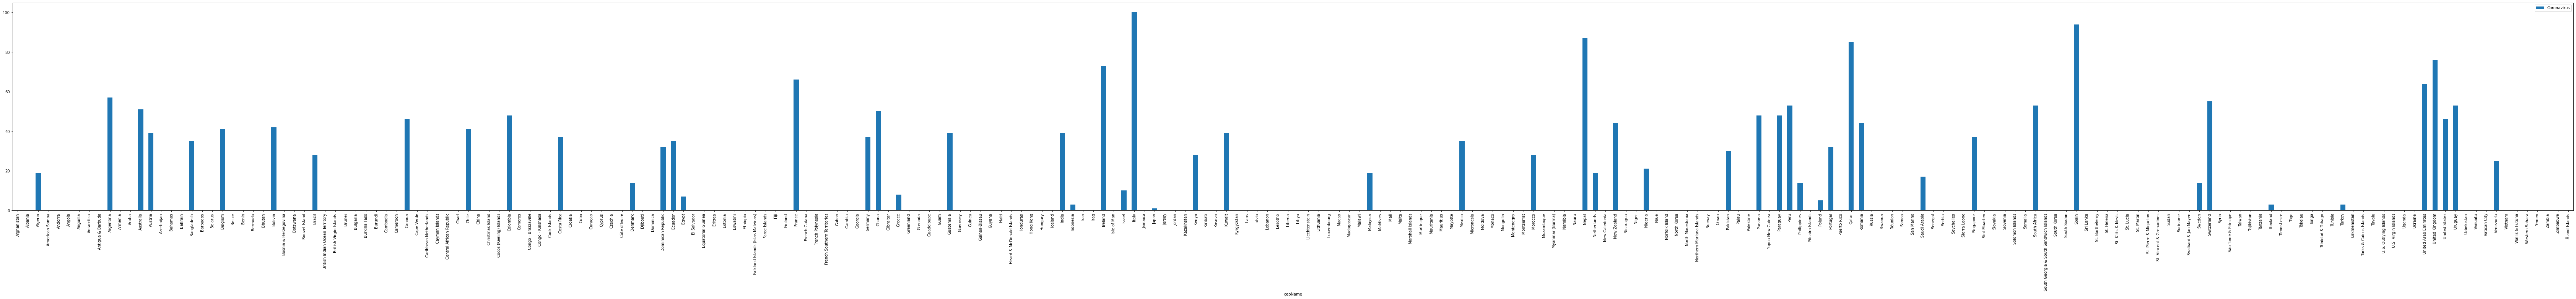

In [4]:
df.reset_index().plot(x = 'geoName', y = 'Coronavirus', figsize = (120, 10), kind = 'bar')
plt.show()

## Daily Search Trends

Exploremos el *top* de las búsquedas diarias a nivel global.

In [5]:
df = pytrend.trending_searches() 
df.head()

,0
0,Golden State Warriors
1,Mortal Kombat
2,Caitlyn Jenner
3,Shadow and Bone
4,Zac Efron


Ahora, exploremos este mismo *top* pero para un país.

In [6]:
df = pytrend.trending_searches(pn='colombia') # no funciona con pn = 'venezuela'
df.head()

,0
0,Liverpool
1,Mainz 05 Bayern
2,PSG
3,Megan Fox
4,Borussia Dortmund


## Top Charts

Exploremos que fue tendencia en el año 2020.

In [7]:
df = pytrend.top_charts(2020, hl='en-US', tz=120, geo='GLOBAL') #tz desplazamiento de zona horaria 
df.head()

,title,exploreQuery
0,Coronavirus,
1,Election results,
2,Kobe Bryant,
3,Zoom,
4,IPL,


Veámos que ocurrió en un país.

In [8]:
df = pytrend.top_charts(2020, hl='en-US', tz=120, geo='CO') # no funciona con geo = 'VE'
df.head()

,title,exploreQuery
0,Coronavirus,
1,Elecciones Estados Unidos,
2,Zoom,
3,Google Classroom,
4,Ingreso solidario,


## Google Keywords Suggestion

In [9]:
keywords = pytrend.suggestions(keyword='Coronavirus')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')   # esta columna no tiene sentido

,title,type
0,Coronavirus,Virus
1,Coronavirus disease 2019,Disease
2,COVID-19 vaccine,Pharmaceutical
3,Severe acute respiratory syndrome coronavirus 2,Virus
4,2019–20 coronavirus pandemic,Topic


## Related Queries

Es común que cuando un usuario busca sobre un tema, este también se busque algo relacionado. Exploremos las búsquedas relacionadas a la palabra 'coronavirus' en Venezuela.

In [10]:
kw_list = ['covid 19', 'coronavirus']
pytrend.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='VE', gprop='') 
# problemas al intentar una entrada distinta a timeframe = 'today 5-y' (e.g. timeframe = 'today 2-y' )

pytrend.related_queries()

{'covid 19': {'top':                              query  value
  0                      el covid 19    100
  1               covid 19 venezuela     67
  2            covid 19 en venezuela     50
  3                  que es covid 19     22
  4                sintomas covid 19     20
  5               que es el covid 19     17
  6               sintomas del covid     14
  7         casos covid 19 venezuela     13
  8            sintomas del covid 19     13
  9      casos covid 19 en venezuela     12
  10          covid 19 venezuela hoy     12
  11  casos en venezuela de covid 19     11
  12     casos de covid 19 venezuela     11
  13                        pandemia      9
  14               pandemia covid 19      9
  15                 vacuna covid 19      9
  16       covid 19 en venezuela hoy      8
  17            covid 19 en el mundo      8
  18               noticias covid 19      8
  19            sintomas de covid 19      8
  20                        covid-19      7
  21         

### Interés por región

Habiendo inicializad el constructor con `pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='VE', gprop='') 
` se puede evaluar el interés en cada uno de los estados de Venezuela.

In [11]:
df = pytrend.interest_by_region(resolution='REGION') # Interés por región en Venezuela
df.head

<bound method NDFrame.head of                       covid 19  coronavirus
geoName                                    
Amazonas                    61           39
Anzoategui                  42           58
Apure                       42           58
Aragua                      40           60
Barinas                     42           58
Bolívar                     44           56
Capital District            35           65
Carabobo                    36           64
Cojedes                     36           64
Delta Amacuro               26           74
Falcón                      44           56
Federal Dependencies         0            0
Guárico                     38           62
Lara                        41           59
Miranda                     36           64
Monagas                     36           64
Mérida                      39           61
Nueva Esparta               38           62
Portuguesa                  38           62
Sucre                       36           64
Tr

### Temas relacionados

por últimpo exploramos los temas relacionados.

In [12]:
rel_temas = pytrend.related_topics()
rel_temas # No hay información

{}

In [13]:
# Intentamos a nivel global
pytrend.build_payload(kw_list) 
rel_temas = pytrend.related_topics()
rel_temas #No hay resultados

{}